In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime


In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7a74a28cdb36d6b7edeacfa3693217e


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7a74a28cdb36d6b7edeacfa3693217e&q=Boston


In [6]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":74.08,"feels_like":73.31,"temp_min":69.75,"temp_max":78.62,"pressure":1018,"humidity":45},"visibility":10000,"wind":{"speed":10.36,"deg":130},"clouds":{"all":20},"dt":1653839179,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1653815507,"sunset":1653869512},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 74.08,
  'feels_like': 73.31,
  'temp_min': 69.75,
  'temp_max': 78.62,
  'pressure': 1018,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 130},
 'clouds': {'all': 20},
 'dt': 1653839179,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653815507,
  'sunset': 1653869512},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 74.08,
  'feels_like': 73.31,
  'temp_min': 69.75,
  'temp_max': 78.62,
  'pressure': 1018,
  'humidity': 45},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 130},
 'clouds': {'all': 20},
 'dt': 1653839179,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653815507,
  'sunset': 1653869512},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1653815507,
 'sunset': 1653869512}

In [16]:
boston_data['sys']['country']

'US'

In [17]:
boston_data["dt"]

1653839179

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 78.62 45 20 10.36


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 5, 29, 15, 46, 19)

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [24]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    print(city)

jamestown
ibirataia
nhulunbuy
tshikapa
hamilton
xingcheng
taolanaro
athabasca
kruisfontein
aginskoye
yarmouth
viedma
ancud
ribeira grande
cody
kruisfontein
necochea
nieuw amsterdam
hvide sande
kuytun
mataura
mataura
punta arenas
mehamn
tangshan
punta arenas
busselton
finschhafen
changli
sentyabrskiy
vaini
faanui
new norfolk
mataura
tikrit
sabang
umzimvubu
amderma
rikitea
vaini
stokmarknes
barentsburg
kodiak
atuona
saint george
tiksi
tinskoy
antalaha
victoria
burica
ilulissat
atuona
jamestown
atuona
port hardy
albany
mataura
college
husavik
balabac
tasiilaq
khatanga
tura
kaitangata
gbarnga
ponta do sol
acapulco
bredasdorp
mataura
nemuro
la ronge
tiksi
cape town
dikson
rikitea
palmer
nikolskoye
bud
busselton
barrow
palaikastron
new norfolk
perieni
san jose
nanortalik
muroto
hermanus
adamantina
kapaa
port macquarie
san
aguimes
jamestown
amahai
butaritari
kruisfontein
bonthe
longyearbyen
vaini
bluff
ca mau
port macquarie
avarua
puerto leguizamo
ushuaia
carnarvon
norman wells
kodiak
alotau


antibes
odweyne
paradwip
dudinka
kikwit
cordoba
namatanai
kruisfontein
atuona
sobolevo
coahuayana
albany
cape town
vao
rikitea
busselton
bredasdorp
illoqqortoormiut
los llanos de aridane
mataura
rikitea
tasiilaq
jamestown
hithadhoo
punta arenas
hushitai
bredasdorp
hermanus
albany
yellowknife
havelock
mahebourg
arraial do cabo
kimberley
bredasdorp
alofi
nouadhibou
thompson
hermanus
portree
busselton
verkh-usugli
rikitea
arraial do cabo
pueblo nuevo
aksu
san pedro
grand river south east
leningradskiy
pacific grove
yellowknife
arraial do cabo
hermanus
mataura
jasper
hermanus
luderitz
mataura
rikitea
norman wells
kavieng
waipawa
nouadhibou
minas
vaitupu
mar del plata
hobart
punta arenas
rikitea
gangakher
marsa matruh
cherskiy
albany
yerbogachen
lebu
nikolskoye
mount pleasant
calama
hithadhoo
bluff
narsaq
port alfred
thompson
cape town
kirakira
amderma
ushuaia
rikitea
ushuaia
zhiryatino
pavlovka
arraial do cabo
sharjah
busselton
rikitea
albany
panama city
kerema
pevek
paamiut
poiares
clyde 

In [25]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
   

jamestown sh
ibirataia br
nhulunbuy au
tshikapa cd
hamilton bm
xingcheng cn
taolanaro mg
athabasca ca
kruisfontein za
aginskoye ru
yarmouth ca
viedma ar
ancud cl
ribeira grande pt
cody us
kruisfontein za
necochea ar
nieuw amsterdam sr
hvide sande dk
kuytun cn
mataura pf
mataura pf
punta arenas cl
mehamn no
tangshan cn
punta arenas cl
busselton au
finschhafen pg
changli cn
sentyabrskiy ru
vaini to
faanui pf
new norfolk au
mataura pf
tikrit iq
sabang id
umzimvubu za
amderma ru
rikitea pf
vaini to
stokmarknes no
barentsburg sj
kodiak us
atuona pf
saint george bm
tiksi ru
tinskoy ru
antalaha mg
victoria ca
burica pa
ilulissat gl
atuona pf
jamestown sh
atuona pf
port hardy ca
albany au
mataura pf
college us
husavik is
balabac ph
tasiilaq gl
khatanga ru
tura ru
kaitangata nz
gbarnga lr
ponta do sol cv
acapulco mx
bredasdorp za
mataura pf
nemuro jp
la ronge ca
tiksi ru
cape town za
dikson ru
rikitea pf
palmer us
nikolskoye ru
bud no
busselton au
barrow us
palaikastron gr
new norfolk au
perien

cape town za
punta arenas cl
port blair in
rondonopolis br
beloha mg
georgetown sh
kahului us
sanpetrul-mare ro
kavaratti in
barrow us
saint-philippe re
souillac mu
barrow us
moranbah au
anadyr ru
mataura pf
mataura pf
victoria sc
kruisfontein za
busselton au
hermanus za
victoria sc
kapaa us
dikson ru
ler sd
bairiki ki
punta arenas cl
busselton au
illoqqortoormiut gl
clyde river ca
saldanha za
rawannawi ki
rikitea pf
bathsheba bb
sentyabrskiy ru
ribeira grande pt
luanda ao
little current ca
hithadhoo mv
nikolskoye ru
kodiak us
ribeira grande pt
hermanus za
bambous virieux mu
leshukonskoye ru
busselton au
port alfred za
tura ru
hermanus za
ippy cf
cape town za
tsihombe mg
rocha uy
taolanaro mg
ponta do sol cv
kaitangata nz
ushuaia ar
hobart au
atuona pf
lahaina us
saleaula ws
gombe ng
bluff nz
rikitea pf
kopayhorod ua
avarua ck
srednekolymsk ru
saint-augustin ca
banepa np
clyde river ca
bagacay ph
jamestown sh
shubarkuduk kz
morgan city us
chuy uy
itoman jp
mujiayingzi cn
port alfred za

beyneu kz
neryungri ru
sherbakul ru
kaitangata nz
avarua ck
palabuhanratu id
tuktoyaktuk ca
ponta do sol cv
santa isabel do rio negro br
trairi br
ushuaia ar
eureka us
kawalu id
butaritari ki
bluff nz
cabo san lucas mx
milkovo ru
touros br
verkhniy rohachyk ua
bluff nz
punta arenas cl
illoqqortoormiut gl
barentsburg sj
sao goncalo do amarante br
atar mr
hilo us


In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7a74a28cdb36d6b7edeacfa3693217e


In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ibirataia
Processing Record 3 of Set 1 | nhulunbuy
Processing Record 4 of Set 1 | tshikapa
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | xingcheng
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | athabasca
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | aginskoye
Processing Record 11 of Set 1 | yarmouth
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | cody
Processing Record 16 of Set 1 | necochea
Processing Record 17 of Set 1 | nieuw amsterdam
Processing Record 18 of Set 1 | hvide sande
Processing Record 19 of Set 1 | kuytun
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | mehamn
Pr

Processing Record 38 of Set 4 | melfort
Processing Record 39 of Set 4 | selma
Processing Record 40 of Set 4 | monroe
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | shambu
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | ayolas
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | kamenka
Processing Record 50 of Set 4 | ahipara
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | requena
Processing Record 3 of Set 5 | puerto ayora
Processing Record 4 of Set 5 | mangrol
Processing Record 5 of Set 5 | kailua
Processing Record 6 of Set 5 | ferme-neuve
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | general pico
Processing Record 10 of Set 5 | trairi
Processing Record 11 of Set 5 | soro
Processing Record 12 of Set 5 | derz

Processing Record 30 of Set 8 | moranbah
Processing Record 31 of Set 8 | anadyr
Processing Record 32 of Set 8 | ler
Processing Record 33 of Set 8 | bairiki
Processing Record 34 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | little current
Processing Record 38 of Set 8 | hithadhoo
Processing Record 39 of Set 8 | leshukonskoye
Processing Record 40 of Set 8 | ippy
Processing Record 41 of Set 8 | lahaina
Processing Record 42 of Set 8 | gombe
Processing Record 43 of Set 8 | kopayhorod
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | banepa
Processing Record 46 of Set 8 | bagacay
Processing Record 47 of Set 8 | shubarkuduk
Processing Record 48 of Set 8 | morgan city
Processing Record 49 of Set 8 | itoman
Processing Record 50 of Set 8 | mujiayingzi
Processing Record 1 of Set 9 | takoradi
Processing Record 2 of Set 9 | bunbury
Processing Record 3 of S

Processing Record 20 of Set 12 | khandbari
Processing Record 21 of Set 12 | chapais
Processing Record 22 of Set 12 | waddan
Processing Record 23 of Set 12 | pangnirtung
Processing Record 24 of Set 12 | antibes
Processing Record 25 of Set 12 | odweyne
Processing Record 26 of Set 12 | kikwit
Processing Record 27 of Set 12 | cordoba
Processing Record 28 of Set 12 | namatanai
Processing Record 29 of Set 12 | sobolevo
Processing Record 30 of Set 12 | coahuayana
Processing Record 31 of Set 12 | hushitai
Processing Record 32 of Set 12 | kimberley
Processing Record 33 of Set 12 | portree
Processing Record 34 of Set 12 | verkh-usugli
Processing Record 35 of Set 12 | pueblo nuevo
Processing Record 36 of Set 12 | aksu
Processing Record 37 of Set 12 | san pedro
Processing Record 38 of Set 12 | pacific grove
Processing Record 39 of Set 12 | jasper
Processing Record 40 of Set 12 | luderitz
Processing Record 41 of Set 12 | waipawa
Processing Record 42 of Set 12 | minas
Processing Record 43 of Set 12 

In [30]:
len(city_data)

597

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,74.01,65,0,4.61,US,2022-05-29 15:49:42
1,Ibirataia,-14.0669,-39.6406,82.89,57,79,1.68,BR,2022-05-29 15:53:22
2,Nhulunbuy,-12.2333,136.7667,74.01,88,94,0.00,AU,2022-05-29 15:53:23
3,Tshikapa,-6.4167,20.8000,83.98,47,24,2.93,CD,2022-05-29 15:53:23
4,Hamilton,39.1834,-84.5333,78.08,69,0,10.36,US,2022-05-29 15:50:30
5,Xingcheng,40.6167,120.7167,55.44,90,12,2.77,CN,2022-05-29 15:53:23
6,Athabasca,54.7169,-113.2854,54.01,85,58,11.18,CA,2022-05-29 15:53:24
7,Kruisfontein,-34.0033,24.7314,54.88,71,46,29.19,ZA,2022-05-29 15:53:24
8,Aginskoye,51.1000,114.5300,42.87,80,99,9.82,RU,2022-05-29 15:53:24
9,Yarmouth,41.7057,-70.2286,76.14,71,0,8.05,US,2022-05-29 15:53:25


In [32]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-05-29 15:49:42,42.0970,-79.2353,74.01,65,0,4.61
1,Ibirataia,BR,2022-05-29 15:53:22,-14.0669,-39.6406,82.89,57,79,1.68
2,Nhulunbuy,AU,2022-05-29 15:53:23,-12.2333,136.7667,74.01,88,94,0.00
3,Tshikapa,CD,2022-05-29 15:53:23,-6.4167,20.8000,83.98,47,24,2.93
4,Hamilton,US,2022-05-29 15:50:30,39.1834,-84.5333,78.08,69,0,10.36
...,...,...,...,...,...,...,...,...,...
592,Kawalu,ID,2022-05-29 15:56:08,-7.3817,108.2082,72.12,95,77,3.51
593,Milkovo,RU,2022-05-29 15:56:08,54.7167,158.6167,43.54,82,78,4.29
594,Verkhniy Rohachyk,UA,2022-05-29 15:56:09,47.2505,34.3380,66.96,66,86,7.14
595,Sao Goncalo Do Amarante,BR,2022-05-29 15:56:09,-3.6072,-38.9683,83.12,68,45,6.87


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

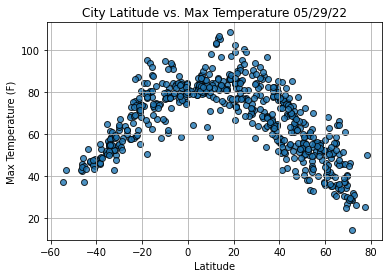

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

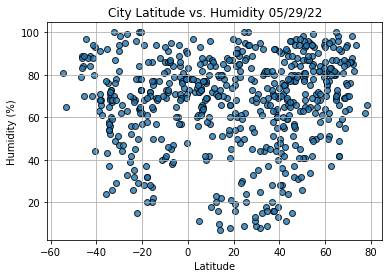

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

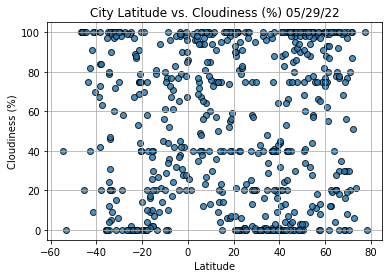

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

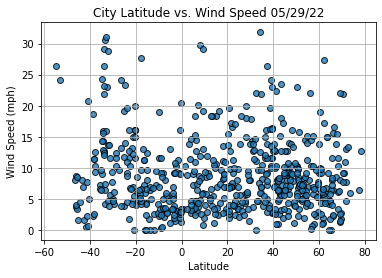

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [43]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [44]:
#The general syntax
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
index13 = city_data_df.loc[13]
index13

City                         Cody
Country                        US
Date          2022-05-29 15:53:26
Lat                       44.5263
Lng                     -109.0565
Max Temp                    54.91
Humidity                       78
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-05-29 15:49:42,42.0970,-79.2353,74.01,65,0,4.61
4,Hamilton,US,2022-05-29 15:50:30,39.1834,-84.5333,78.08,69,0,10.36
5,Xingcheng,CN,2022-05-29 15:53:23,40.6167,120.7167,55.44,90,12,2.77
6,Athabasca,CA,2022-05-29 15:53:24,54.7169,-113.2854,54.01,85,58,11.18
8,Aginskoye,RU,2022-05-29 15:53:24,51.1000,114.5300,42.87,80,99,9.82


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

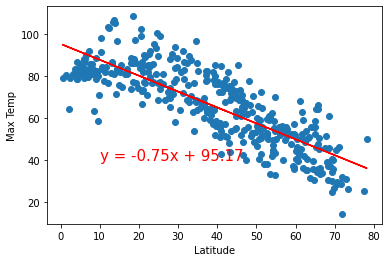

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

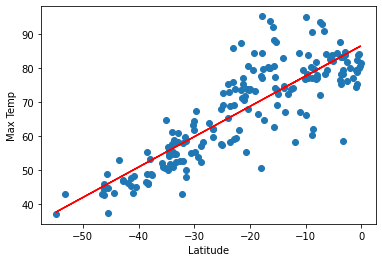

In [49]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for Maximum Temperature', 'Max Temp',(10,40))



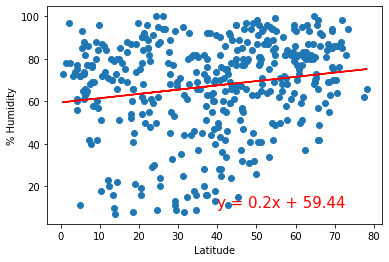

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

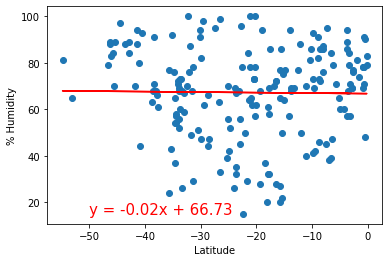

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

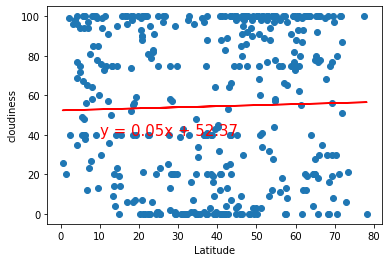

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'cloudiness',(10,40))

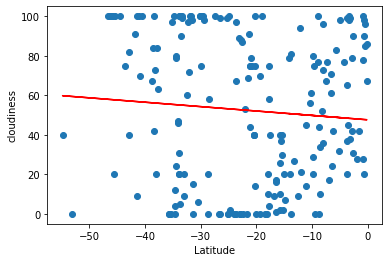

In [53]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for cloudiness', 'cloudiness',(10,40))

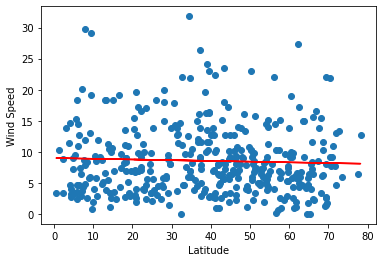

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

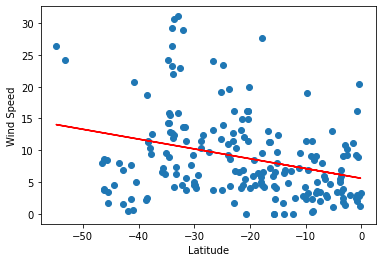

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))